In [48]:
import pandas as pd

In [49]:
dataFrama = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [50]:
dataFrama

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [51]:
dataFrama.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [52]:
import seaborn as sbn
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


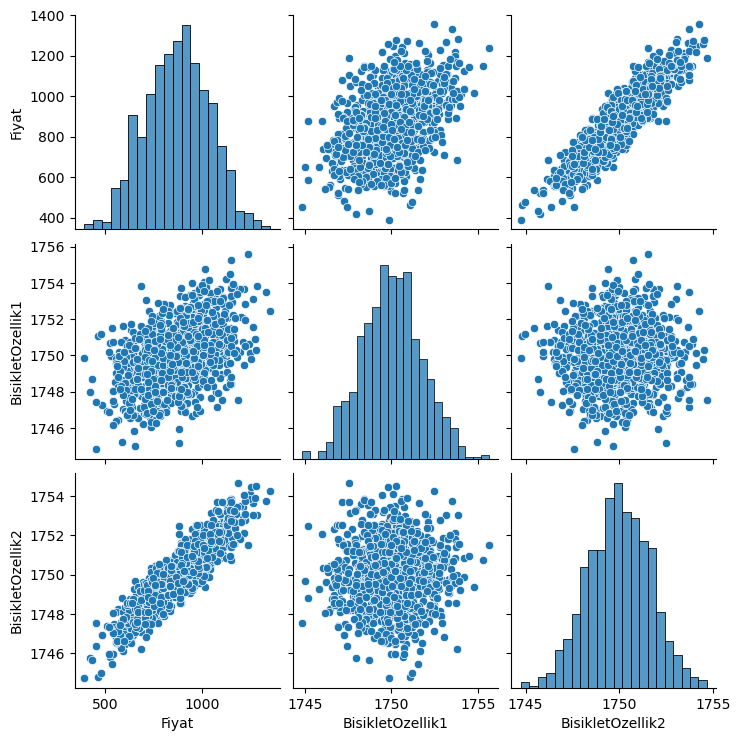

In [53]:
sbn.pairplot(dataFrama)

## veriyi test/train olarak kullanabilmek

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
# train_test_split

In [56]:
dataFrama

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [57]:
# y = wx+b
# y => label
y = dataFrama["Fiyat"].values

#x => feature
x = dataFrama[["BisikletOzellik1" , "BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
#test_size => Buradaki oran bize test verisi için verinin ne kadarı kullanacağı ile bilgi veriyor

In [58]:
x_train.shape

(670, 2)

In [59]:
x_test.shape

(330, 2)

In [60]:
#scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler


In [62]:
scaler = MinMaxScaler()

In [63]:
scaler.fit(x_train)

MinMaxScaler()

In [64]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
x_test

array([[ 0.39533335,  0.38540674],
       [ 0.57300503,  0.74070922],
       [ 0.61294073,  0.65734262],
       [ 0.38169527,  0.73076306],
       [ 0.07776588,  0.46323646],
       [ 0.49421974,  0.68949256],
       [ 0.20657418,  0.70096245],
       [ 0.55141986,  0.41776772],
       [ 0.36812184,  0.69082392],
       [ 0.56465726,  0.38774652],
       [ 0.57048026,  0.7181082 ],
       [ 0.79569522,  0.47979896],
       [ 0.38488231,  0.4185652 ],
       [ 0.33142547,  0.42411974],
       [ 0.89361375,  0.63912768],
       [ 0.50191165,  0.39789172],
       [ 0.71598079,  0.43688382],
       [ 0.3581219 ,  0.92028226],
       [ 0.49989366,  0.85589308],
       [ 0.63965431,  0.59024782],
       [ 0.1905362 ,  0.34203635],
       [ 0.40982893,  0.45849202],
       [ 0.26844786,  0.40167268],
       [ 0.38649708,  0.33592761],
       [ 0.50654703,  0.65789836],
       [ 0.41260559,  0.79338073],
       [ 0.45631314,  0.61323306],
       [ 0.44064793,  0.40889311],
       [ 0.42963904,

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()

model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [68]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 828108.5625  
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 777772.8125
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 808564.5625
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 800645.8750
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 790475.8750
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 782711.1250
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 786420.8750
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 795044.3750
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 798852.8125
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 786743.3750
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 784844.8125
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 788012.5000
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 781732.4375
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 865u

In [69]:
loss = model.history.history["loss"]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

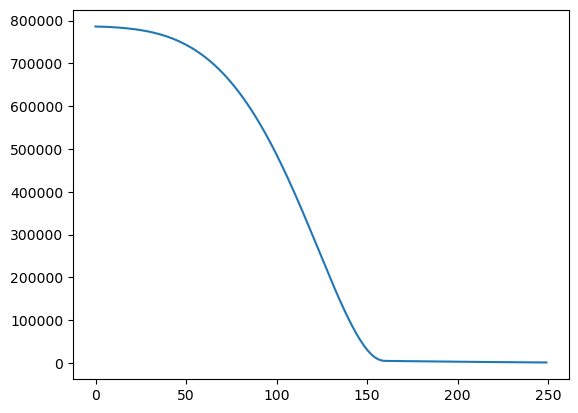

In [70]:
sbn.lineplot(x=range(len(loss)),y=loss)


In [71]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [72]:
testLoss = model.evaluate(x_test,y_test,verbose=0)


In [73]:
testLoss

1240.353515625

In [74]:
trainLoss

1243.6676025390625

In [75]:
testTahminleri = model.predict(x_test)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [76]:
testTahminleri


array([[ 746.2397 ],
       [1051.1628 ],
       [1010.4796 ],
       [ 972.17206],
       [ 678.2435 ],
       [ 987.10284],
       [ 886.0169 ],
       [ 826.9108 ],
       [ 940.3152 ],
       [ 811.8279 ],
       [1035.0852 ],
       [ 960.7802 ],
       [ 764.47546],
       [ 747.9798 ],
       [1104.4159 ],
       [ 794.8918 ],
       [ 901.9237 ],
       [1090.0721 ],
       [1100.5922 ],
       [ 975.6849 ],
       [ 639.784  ],
       [ 800.6243 ],
       [ 709.14746],
       [ 709.7906 ],
       [ 970.62317],
       [1025.7589 ],
       [ 921.7425 ],
       [ 779.089  ],
       [1087.4722 ],
       [ 763.9929 ],
       [ 803.7951 ],
       [ 857.83655],
       [ 793.5636 ],
       [1126.2904 ],
       [ 782.5519 ],
       [ 757.6549 ],
       [ 896.17175],
       [ 950.232  ],
       [ 881.39996],
       [ 719.09924],
       [1047.3191 ],
       [ 766.15515],
       [1027.0453 ],
       [ 812.9469 ],
       [ 881.0785 ],
       [1007.9227 ],
       [1125.8956 ],
       [ 870.

In [77]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [78]:
tahminDf

,Gerçek Y
0,704.018558
1,1092.273347
2,1019.296366
3,1012.530061
4,649.642181
...,...
325,937.201433
326,745.226389
327,645.610167
328,884.855797


In [79]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))


In [80]:
testTahminleri

0       746.239685
1      1051.162842
2      1010.479614
3       972.172058
4       678.243530
          ...     
325     921.946350
326     794.416443
327     706.207947
328     869.345642
329     866.919067
Length: 330, dtype: float32

In [81]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)


In [82]:
tahminDf

,Gerçek Y,0
0,704.018558,746.239685
1,1092.273347,1051.162842
2,1019.296366,1010.479614
3,1012.530061,972.172058
4,649.642181,678.243530
...,...,...
325,937.201433,921.946350
326,745.226389,794.416443
327,645.610167,706.207947
328,884.855797,869.345642


In [83]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]


In [84]:
tahminDf


,Gerçek Y,Tahmin Y
0,704.018558,746.239685
1,1092.273347,1051.162842
2,1019.296366,1010.479614
3,1012.530061,972.172058
4,649.642181,678.243530
...,...,...
325,937.201433,921.946350
326,745.226389,794.416443
327,645.610167,706.207947
328,884.855797,869.345642


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

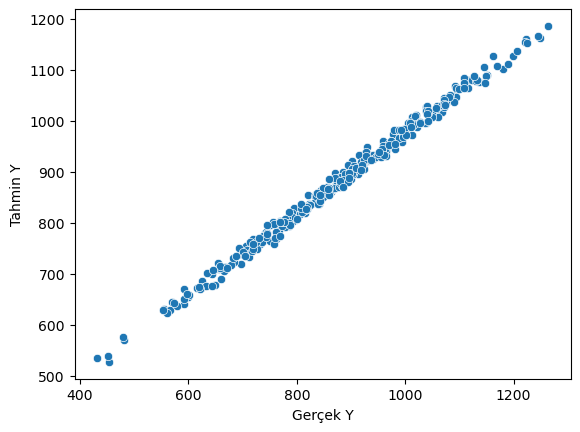

In [85]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)


In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [91]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])


27.969137928683715

In [92]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])


1240.3535004753294

In [96]:
print(dataFrama.describe())

             Fiyat  BisikletOzellik1  BisikletOzellik2
count  1000.000000       1000.000000       1000.000000
mean    872.677801       1750.024800       1749.964733
std     164.124504          1.704531          1.659578
min     390.856887       1744.852108       1744.742389
25%     757.795031       1748.831119       1748.803186
50%     879.168705       1750.017350       1750.003926
75%     988.612778       1751.115765       1751.129414
max    1355.213745       1755.613884       1754.666038


In [97]:
yeniBisikletOzellikleri = [[1751,1750]]


In [98]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)


In [99]:
model.predict(yeniBisikletOzellikleri)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[913.71045]], dtype=float32)

In [100]:
from tensorflow.keras.models import load_model


In [101]:
model.save("bisiklet_modeli.h5")


In [102]:
sonradanCagirilanModel= load_model("bisiklet_modeli.h5")


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}